## Question

# 	Detecting spam mails using Naïve Bayes 

In [3]:
! pip install numpy pandas scikit-learn matplotlib

Defaulting to user installation because normal site-packages is not writeable
  Using cached numpy-2.2.3-cp312-cp312-win_amd64.whl.metadata (60 kB)
  Using cached pandas-2.2.3-cp312-cp312-win_amd64.whl.metadata (19 kB)
     ---------------------------------------- 0.0/60.8 kB ? eta -:--:--
     ---------------------------------------- 60.8/60.8 kB 1.6 MB/s eta 0:00:00
     ---------------------------------------- 0.0/104.0 kB ? eta -:--:--
     -------------------------------------- 104.0/104.0 kB 3.0 MB/s eta 0:00:00
   ---------------------------------------- 0.0/12.6 MB ? eta -:--:--
   ---------------------------------------- 0.1/12.6 MB 3.6 MB/s eta 0:00:04
    --------------------------------------- 0.3/12.6 MB 3.3 MB/s eta 0:00:04
   - -------------------------------------- 0.4/12.6 MB 2.9 MB/s eta 0:00:05
   - -------------------------------------- 0.6/12.6 MB 2.9 MB/s eta 0:00:05
   -- ------------------------------------- 0.7/12.6 MB 2.9 MB/s eta 0:00:05
   -- ---------------


[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
! pip install seaborn

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/294.9 kB ? eta -:--:--
   ---------------------------------------- 0.0/294.9 kB ? eta -:--:--
   - -------------------------------------- 10.2/294.9 kB ? eta -:--:--
   - -------------------------------------- 10.2/294.9 kB ? eta -:--:--
   ---- ---------------------------------- 30.7/294.9 kB 217.9 kB/s eta 0:00:02
   ----- --------------------------------- 41.0/294.9 kB 217.9 kB/s eta 0:00:02
   ----------------------------- -------- 225.3/294.9 kB 981.9 kB/s eta 0:00:01
   ---------------------------------------- 294.9/294.9 kB 1.1 MB/s eta 0:00:00



[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [43]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import  MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [206]:

df = pd.read_csv("spam.csv",  encoding='latin-1')

In [207]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [208]:
df.columns

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

In [209]:
df.drop(columns = [ 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace = True)

In [210]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [211]:
df.columns = ["label", "message"]

In [212]:
df


,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [213]:
df["label"] = df["label"].map({"spam": 1, "ham" : 0})

In [214]:
df.head()

,label,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [215]:
df.isnull().sum()

label      0
message    0
dtype: int64

In [243]:
spam_counts = df['label'].value_counts()
spam_counts

label
0    4825
1     747
Name: count, dtype: int64

In [ ]:
df["label"]

C:\Users\midmod249\AppData\Local\Temp\ipykernel_10128\482130159.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=["Not Spam", "Spam"], y=spam_counts.values, palette=['blue', 'red'])


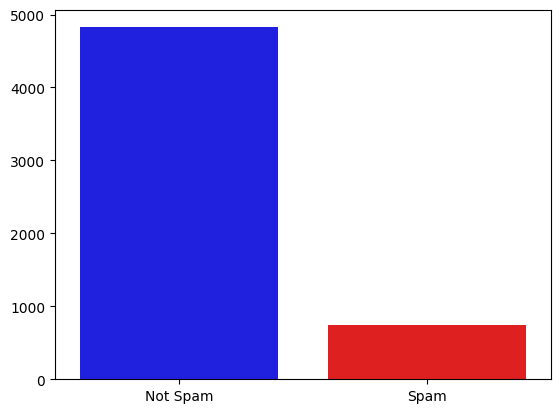

In [245]:
#barplot

sns.barplot(x=["Not Spam", "Spam"], y=spam_counts.values, palette=['blue', 'red'])
plt.show()

In [217]:
df.head()

,label,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [218]:
df.describe()

,label
count,5572.000000
mean,0.134063
std,0.340751
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [219]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
# vectorizer = CountVectorizer()
classifier = MultinomialNB()


In [221]:
X = df["message"]
Y = df["label"]

In [224]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, random_state= 42, test_size= 0.2)

In [226]:
x_train


1978    No I'm in the same boat. Still here at my moms...
3989    (Bank of Granite issues Strong-Buy) EXPLOSIVE ...
3935       They r giving a second chance to rahul dengra.
4078       O i played smash bros  &lt;#&gt;  religiously.
4086    PRIVATE! Your 2003 Account Statement for 07973...
                              ...                        
3772    I came hostel. I m going to sleep. Plz call me...
5191                               Sorry, I'll call later
5226        Prabha..i'm soryda..realy..frm heart i'm sory
5390                           Nt joking seriously i told
860                   In work now. Going have in few min.
Name: message, Length: 4457, dtype: object

In [187]:
x_test

,message
3245,1036
944,1930
1044,4338
2484,3217
812,615
...,...
4264,2
2439,3404
5556,4711
4205,1066


In [227]:
vectorizer = CountVectorizer()
x_train = vectorizer.fit_transform(x_train)

In [228]:
classifier.fit(x_train, y_train)

MultinomialNB()

In [229]:
from sklearn.metrics import classification_report, confusion_matrix


In [230]:
x_test = vectorizer.transform(x_test)

In [232]:
for email, actual in zip(x_test, y_test):
    prediction = classifier.predict(email)
    print(f"Email: \"{email}\"\nActual: {'Spam' if actual == 1 else 'Not Spam'}\nPrediction: {'Spam' if prediction == 1 else 'Not Spam'}\n")


Email: "<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 11 stored elements and shape (1, 7735)>
  Coords	Values
  (0, 1808)	1
  (0, 2759)	1
  (0, 3067)	1
  (0, 3337)	1
  (0, 3567)	1
  (0, 3873)	1
  (0, 4685)	1
  (0, 4773)	1
  (0, 4776)	1
  (0, 7040)	1
  (0, 7482)	1"
Actual: Not Spam
Prediction: Not Spam

Email: "<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 31 stored elements and shape (1, 7735)>
  Coords	Values
  (0, 923)	1
  (0, 955)	1
  (0, 1036)	1
  (0, 1987)	1
  (0, 2023)	1
  (0, 2375)	2
  (0, 2731)	1
  (0, 2836)	1
  (0, 2954)	1
  (0, 3298)	1
  (0, 3415)	1
  (0, 3600)	1
  (0, 3739)	1
  (0, 3837)	1
  (0, 4071)	1
  (0, 4390)	1
  (0, 4646)	1
  (0, 4869)	1
  (0, 4912)	1
  (0, 4918)	1
  (0, 4919)	1
  (0, 5709)	1
  (0, 5916)	1
  (0, 5917)	1
  (0, 5922)	1
  (0, 5994)	1
  (0, 6786)	1
  (0, 6816)	1
  (0, 6819)	1
  (0, 6906)	2
  (0, 7679)	1"
Actual: Not Spam
Prediction: Not Spam

Email: "<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 14 stored elements

In [234]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

y_pred = classifier.predict(x_test)


accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")


report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)


conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)


Accuracy: 0.98
Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99       965
           1       0.99      0.89      0.94       150

    accuracy                           0.98      1115
   macro avg       0.98      0.95      0.96      1115
weighted avg       0.98      0.98      0.98      1115

Confusion Matrix:
 [[963   2]
 [ 16 134]]


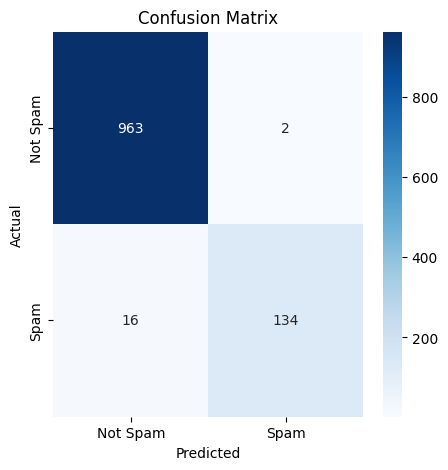

In [235]:
plt.figure(figsize=(5,5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Not Spam', 'Spam'], yticklabels=['Not Spam', 'Spam'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [237]:
from sklearn.metrics import r2_score, mean_squared_error

In [238]:
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

In [239]:
print(r2, mse)

0.8613471502590674 0.016143497757847534
